# 加载环境

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame

import keras
from keras.utils import np_utils
from keras.layers import Input, TimeDistributed, Flatten, Dense, Dropout
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF

Using TensorFlow backend.


# 超参数

In [2]:
LENGTH = 256
LENGTH_4_model = 2*LENGTH+1
EPOCHES = 30
BATCH_SIZE = 300
HIDDEN_UNITS = 1024

# 数据载入

In [3]:
X_train4D = np.load(r".\data\X_train4D.npy")
X_test4D = np.load(r".\data\X_test4D.npy")
Y_train_One_Hot = np.load(r".\data\Y_train_One_Hot.npy")
Y_test_One_Hot = np.load(r".\data\Y_test_One_Hot.npy")

# 建立模型

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [5]:
model = Sequential()

## 卷积层1 (20×LENGTH 16层)

In [6]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(LENGTH_4_model,20,1), 
                 activation='relu'))

## 池化层1 (20×½LENGTH 16层)

In [7]:
model.add(MaxPooling2D(pool_size=(2, 2)))

## 卷积层2 (10×½LENGTH 36层)

In [8]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

## 池化层2 (10×¼LENGTH 36层)

In [9]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
model.add(Dropout(0.25))

## 平坦层 (5×¼LENGTH*36个神经元)

In [11]:
model.add(Flatten())

In [12]:
ppi_file = r'.\data\HIPPIE_v2.1.tsv'
fasta_file = r'.\data\HUMAN_uniport.fasta'

## 隐藏层 (HIDDEN_LAYER_NEURONS个神经元)

In [13]:
model.add(Dense(HIDDEN_UNITS, activation='relu'))

In [14]:
model.add(Dropout(0.5))

## 输出层 (2个神经元)

In [15]:
model.add(Dense(2,activation='softmax'))

In [16]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 513, 20, 16)       416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 10, 16)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 10, 36)       14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 5, 36)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 5, 36)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 23040)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              23593984  
__________

# 训练模型

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [18]:
train_history=model.fit(x=X_train4D, 
                        y=Y_train_One_Hot,validation_split=0.2, 
                        epochs=EPOCHES, batch_size=BATCH_SIZE,verbose=2)

Train on 11617 samples, validate on 2905 samples
Epoch 1/30
 - 19s - loss: 0.7845 - acc: 0.5982 - val_loss: 0.8716 - val_acc: 0.1910
Epoch 2/30
 - 10s - loss: 0.4261 - acc: 0.8184 - val_loss: 0.6107 - val_acc: 0.7212
Epoch 3/30
 - 10s - loss: 0.2889 - acc: 0.8868 - val_loss: 0.4496 - val_acc: 0.7955
Epoch 4/30
 - 10s - loss: 0.2405 - acc: 0.9082 - val_loss: 0.2829 - val_acc: 0.8596
Epoch 5/30
 - 10s - loss: 0.2050 - acc: 0.9214 - val_loss: 0.3078 - val_acc: 0.8551
Epoch 6/30
 - 10s - loss: 0.1684 - acc: 0.9351 - val_loss: 0.2800 - val_acc: 0.8647
Epoch 7/30
 - 10s - loss: 0.1421 - acc: 0.9439 - val_loss: 0.3345 - val_acc: 0.8554
Epoch 8/30
 - 10s - loss: 0.1236 - acc: 0.9510 - val_loss: 0.3472 - val_acc: 0.8568
Epoch 9/30
 - 10s - loss: 0.0988 - acc: 0.9627 - val_loss: 0.3276 - val_acc: 0.8695
Epoch 10/30
 - 10s - loss: 0.0865 - acc: 0.9657 - val_loss: 0.2199 - val_acc: 0.9043
Epoch 11/30
 - 10s - loss: 0.0703 - acc: 0.9734 - val_loss: 0.3394 - val_acc: 0.8744
Epoch 12/30
 - 10s - loss

In [19]:
def show_train_history_acc(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.ylim((0, 1))
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
def show_train_history_loss(train_loss,test_loss):
    plt.plot(train_history.history[train_loss])
    plt.plot(train_history.history[test_loss])
    plt.ylim((0, 1))         
    plt.title('Train History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

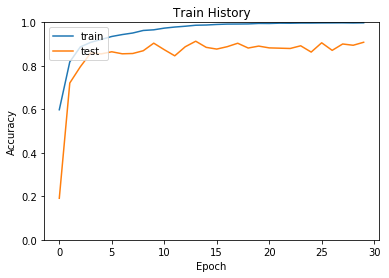

In [20]:
show_train_history_acc('acc','val_acc')

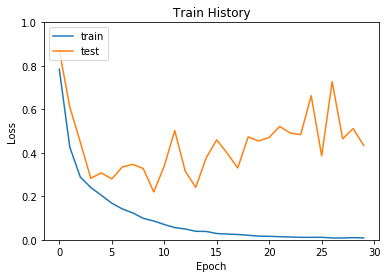

In [21]:
show_train_history_loss('loss','val_loss')

# 评估模型的准确率

In [22]:
scores = model.evaluate(X_test4D , Y_test_One_Hot)
scores[1]

3582/3582 [==============================] - 1s 385us/step


0.9380234504198642

In [23]:
prediction=model.predict_classes(X_test4D)

In [24]:
Y_test = np.load(r".\data\Y_test.npy")

In [25]:
pd.crosstab(Y_test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1
label,,
0,1633,160
1,62,1727


In [26]:
predicted_Probaility = model.predict(X_test4D)

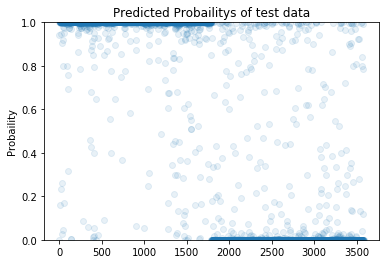

In [27]:
X,Y = [], []
for i in range(len(predicted_Probaility)):
    X.append(i+1)
    Y.append(predicted_Probaility[i][1])
fig = plt.figure()
plt.scatter(X, Y, alpha=0.1)
plt.ylim((0, 1))
plt.ylabel('Probaility')
plt.title('Predicted Probailitys of test data')
plt.show()

# 保存模型

In [28]:
model.save(r'./model/toy.h5')